In [44]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

#### Here I have imported fetch_openml in order to do a fetch of mnist_784 dataset

In [2]:
mnist=fetch_openml("mnist_784",version=1) # Fetching dataset

In [3]:
x,y=np.array(mnist.data),mnist.target

#### Since our dataset comprises of categorical data mainly data, target, class, feature_names and so on and we only need the dataset and the target set, we have selected those only.

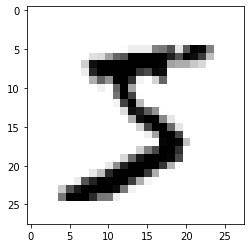

And the result for the above image is 5


In [4]:
plt.figure()
plt.imshow(x[0].reshape(28,28),cmap=mpl.cm.binary,interpolation="nearest")
plt.show()
print("And the result for the above image is",y[0])

In [5]:
y=y.astype(np.uint8)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)

In [20]:
model=LogisticRegression(C=1.0,solver="saga",n_jobs=2,max_iter=1,
                         tol=0.001,intercept_scaling=1,random_state=42,verbose=0,
                         warm_start=False,class_weight=None)
model.fit(x_train,y_train)
predicted=model.predict(x_test)

/home/sashank/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [21]:
len(x_train)

49000

#### C is set to default. since our dataset is normally large, and saga is comparitively faster than sag so we have chosen saga as our solver. I have defined 2 cores to be used for computation. Tolerance is set to 0.001. In order to produce same output in every runs, random state of 42 is set. 

In [24]:
score=model.score(x_test,y_test)
print("The accuracy of our classifier on the test set is",score)

The accuracy of our classifier on the test set is 0.9147619047619048


In [97]:
from sklearn.metrics import *

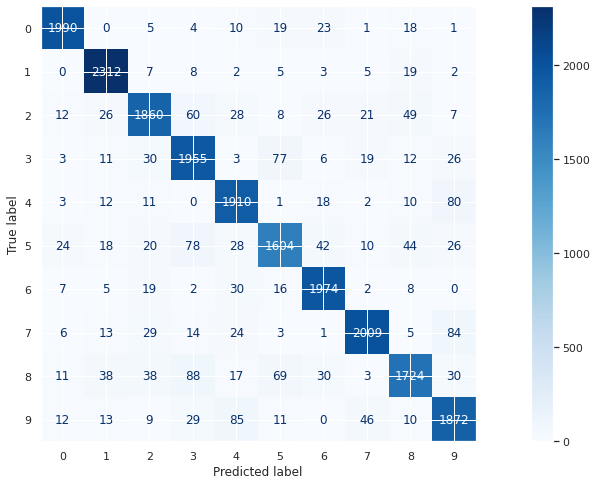

In [157]:
fig,ax = plt.subplots(figsize=(20, 8))
plot_confusion_matrix(model,x_test,y_test, cmap=plt.cm.Blues, ax=ax)
plt.show()

#### As it can be seen from the matrix above, out of 2070 "0"s on the training set, 1990 were labelled as "0". Out of 2367 data for 1, only 2312 were predicted correctly. The diagonal values starting from the top left corner are the correctly predicted ones for the individual digits starting from 0. The numbers above the diagonal are false positives(False but predicted to be true) and those below the diagonal are false negatives(Actually true but predicted as false). we can use the above data to calculate the overall performance of our classifier. With the use of measurement techniques like f1 score, precision and recall, we can calculate how our algorithm performed with the test set provided.

In [39]:
cr=classification_report(y_test,predicted)
%print(cr)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2071
           1       0.94      0.98      0.96      2363
           2       0.92      0.89      0.90      2097
           3       0.87      0.91      0.89      2142
           4       0.89      0.93      0.91      2047
           5       0.88      0.85      0.87      1894
           6       0.93      0.96      0.94      2063
           7       0.95      0.92      0.93      2188
           8       0.91      0.84      0.87      2048
           9       0.88      0.90      0.89      2087

    accuracy                           0.91     21000
   macro avg       0.91      0.91      0.91     21000
weighted avg       0.91      0.91      0.91     21000



#### As we can deduce from the table above, our individual precision for the above classification is higher than 88% and since our dataset is distributed equally, the macro average and the weighted average is the same for precision, recall, f1 score and support. The precision for 1 is "0.96" which means that when it predicted 1, it is correct 96% of the time. The recall for digit 2 is 0.98 which means that when the model predicted 2, if predicted correctly 98% of the time. The f1 score is the weighted average of the precision and recall of the consecutive digits

